* Decision Tree
 
* Problem Statement:
* A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
* Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

* About the data: 
* Let’s consider a Company dataset with around 10 variables and 400 records. 
* The attributes are as follows: 

* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not

* Loaded Company Data
* Checked for datatypes and null values
* Converted the sales column into high and low sales category
    Used sales >= 7000 as high
    and sales < 7000 as low
* Converted the sales,ShelveLoc,urban,us cols to binary format using bitencoder
* Calculated Accuracy, f1 score for test data using DT model with & w/0 scaled input
* Plotted feature importance graph to find out which feature affects the sales
* Used scatter plot to display price and sales are inversely related.

In [107]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

In [108]:
df = pd.read_csv('Company_Data.csv')
print(df.dtypes)
df.head(10)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [109]:
df.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
390,5.47,108,75,9,61,111,Medium,67,12,Yes,Yes
391,6.10,153,63,0,49,124,Bad,56,16,Yes,No
392,4.53,129,42,13,315,130,Bad,34,13,Yes,Yes
393,5.57,109,51,10,26,120,Medium,30,17,No,Yes
394,5.35,130,58,19,366,139,Bad,33,16,Yes,Yes
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


Text(0, 0.5, 'Sales')

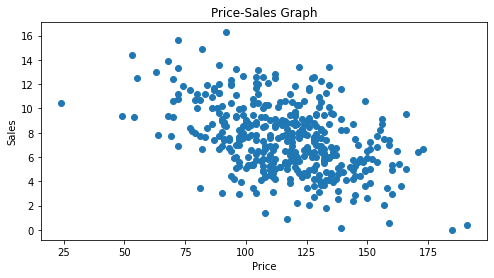

In [110]:
plt.figure(figsize=(8,4))
plt.scatter(x=df.Price, y=df.Sales)
plt.title("Price-Sales Graph")
plt.xlabel("Price")
plt.ylabel("Sales")

In [111]:
print(df.dtypes)
print(df.isnull().sum())
df.describe(include='all')

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [112]:
#either lambda or user defined function can be used in apply method
def rate_sales(x):
    if x >= 7:
        return 'High'
    else:
        return 'Low'

df['Sales'] = df.Sales.apply(rate_sales) 
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,High,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,High,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [113]:
df.dtypes

Sales          object
CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

<AxesSubplot:xlabel='Sales', ylabel='count'>

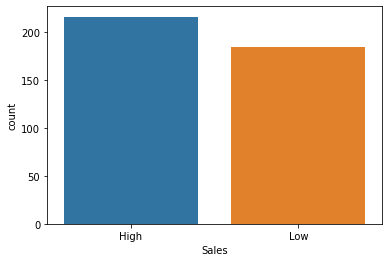

In [114]:
# dataset is balanced
sns.countplot(df['Sales'])

In [115]:
#will convert the cols having object type to binary format
# will convert cols like urban, US, shelveloc to int dtype
le = LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
            df[column_name]  = le.fit_transform(df[column_name])
    else:
        pass

In [116]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


<AxesSubplot:xlabel='Sales', ylabel='count'>

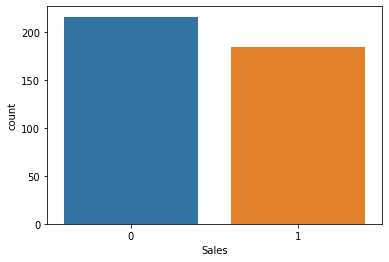

In [117]:
# 0 represents High sales
# 1 represents low sales
sns.countplot(df['Sales'])

In [118]:
print(df.dtypes)
df.describe(include='all')

Sales          int32
CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int32
Age            int64
Education      int64
Urban          int32
US             int32
dtype: object


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.460000,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,0.499022,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,0.000000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,0.000000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,1.000000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,1.000000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [119]:
x = df.iloc[:,1:]
y = df[['Sales']]
print(y)
x

     Sales
0        0
1        0
2        0
3        0
4        1
..     ...
395      0
396      1
397      0
398      1
399      0

[400 rows x 1 columns]


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


## Scaling input

In [120]:
scaler = StandardScaler()
x_transformed = scaler.fit_transform(x) #passing input

# only for checking whether the data is transformed or not
# checking display for mean=0 and SD =1
colsname = {'CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'}
x_transformed_display = pd.DataFrame(x_transformed,columns=colsname)
print(x_transformed_display.std())
print(x_transformed_display.mean())

Price          1.001252
ShelveLoc      1.001252
Population     1.001252
Age            1.001252
Advertising    1.001252
CompPrice      1.001252
Education      1.001252
US             1.001252
Urban          1.001252
Income         1.001252
dtype: float64
Price          3.483325e-16
ShelveLoc      5.162537e-17
Population    -6.161738e-17
Age            1.454392e-16
Advertising   -6.994405e-17
CompPrice     -2.192690e-17
Education      1.786071e-16
US            -2.534084e-16
Urban          2.697842e-16
Income        -8.160139e-17
dtype: float64


## Model Building,training,testing,evaluation - without scaling

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# training the model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

# predicting Sales
y_pred_train = dt_model.predict(x_train) # for training data
y_pred_test  = dt_model.predict(x_test) # for test data

# evaluation metrics
print("Accuracy score Training = ",accuracy_score(y_train,y_pred_train)) #training data
print("Accuracy score Test     = ",accuracy_score(y_test,y_pred_test)) #test data
print("F1 score                = ",f1_score(y_test,y_pred_test)) #test data
print("AUC score               = ",roc_auc_score(y_test,y_pred_test)) #test data
print(confusion_matrix(y_test,y_pred_test))

(320, 10)
(80, 10)
(320, 1)
(80, 1)
Accuracy score Training =  1.0
Accuracy score Test     =  0.725
F1 score                =  0.7027027027027027
AUC score               =  0.7234443746071653
[[32 11]
 [11 26]]


## Model Building,training,testing,evaluation - with Scaled input

In [122]:
x_train_scaled,x_test_scaled,y_train,y_test = train_test_split(x_transformed,y,test_size=0.20, random_state = 1)
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

# training the model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled,y_train)

# predicting Sales
y_pred_train_scaled = dt_model.predict(x_train_scaled) # for training data
y_pred_test_scaled  = dt_model.predict(x_test_scaled) # for test data

# evaluation metrics
print("Accuracy score Training = ",accuracy_score(y_train,y_pred_train_scaled)) #training data
print("Accuracy score Test     = ",accuracy_score(y_test,y_pred_test_scaled)) #test data
print("F1 score                = ",f1_score(y_test,y_pred_test_scaled)) #test data
print("AUC score               = ",roc_auc_score(y_test,y_pred_test_scaled)) #test data
print(confusion_matrix(y_test,y_pred_test_scaled))

(320, 10)
(80, 10)
(320, 1)
(80, 1)
Accuracy score Training =  1.0
Accuracy score Test     =  0.75
F1 score                =  0.7435897435897435
AUC score               =  0.7523570081709616
[[31 12]
 [ 8 29]]


* Scaling the input increases the accuracy of test data
* Also, F1 score increases is 0.7 which is near to 1(desirable score for F1)

## Model Optimization - GridsearchCV

In [123]:
dt_model_tweaked = GridSearchCV(estimator= dt_model, param_grid = { 'criterion' : ["gini", "entropy"],
                                                                   'max_depth' :[2,3,4,5,6,7],
                                                                    'min_samples_split' : [2,3,4,5]                                                                                                   
                                                                   })
dt_model_tweaked.fit(x_train,y_train)
print(dt_model_tweaked.best_params_)
print(dt_model_tweaked.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4}
0.746875


In [124]:
# training the model
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 5)
dt_model.fit(x_train_scaled,y_train)

# predicting Sales
y_pred_train_scaled = dt_model.predict(x_train_scaled) # for training data
y_pred_test_scaled  = dt_model.predict(x_test_scaled) # for test data

# evaluation metrics
print("Accuracy score Training = ",accuracy_score(y_train,y_pred_train_scaled)) #training data
print("Accuracy score Test     = ",accuracy_score(y_test,y_pred_test_scaled)) #test data
print("F1 score                = ",f1_score(y_test,y_pred_test_scaled)) #test data
print("AUC score               = ",roc_auc_score(y_test,y_pred_test_scaled)) #test data
print(confusion_matrix(y_test,y_pred_test_scaled))

Accuracy score Training =  0.884375
Accuracy score Test     =  0.7375
F1 score                =  0.7200000000000001
AUC score               =  0.7369578881206789
[[32 11]
 [10 27]]


In [125]:
dt_importance = dt_model.feature_importances_
FIM = pd.DataFrame({'Features':x.columns,'DT Feature Importance' : dt_importance})
FIM = FIM.sort_values(by='DT Feature Importance', ascending = False)
FIM
# FIM['Feature Importance'].sum()

,Features,DT Feature Importance
4,Price,0.342231
5,ShelveLoc,0.256631
6,Age,0.131213
0,CompPrice,0.098099
1,Income,0.079571
2,Advertising,0.048927
8,Urban,0.027251
7,Education,0.016078
3,Population,0.000000
9,US,0.000000


Text(0, 0.5, 'Features')

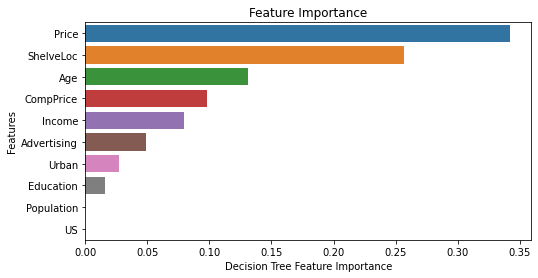

In [126]:
#graphical representation of feature importance
plt.figure(figsize=(8,4))
sns.barplot(x= 'DT Feature Importance', y='Features', data = FIM)
plt.title('Feature Importance')
plt.xlabel('Decision Tree Feature Importance')
plt.ylabel('Features')

* As from the above table Price attribute is affecting the sales the most followed by Shelvel Loc and Age attributes
* From scatter plot, Sales is high when price is less.

* Loaded Company Data
* Checked for datatypes and null values
* Converted the sales column into high and low sales category
    Used sales >= 7000 as high
    and sales < 7000 as low
* Converted the sales,ShelveLoc,urban,us cols to binary format using bitencoder
* Calculated Accuracy, f1 score for test data using DT model with & w/0 scaled input
* Plotted feature importance graph to find out which feature affects the sales
* Used scatter plot to display price and sales are inversely related.


* DecisionTree Model Evaluation

* 1. Without scaled input
     Accuracy       Training       Test        F1-score Test
                    100 %          73 %         70 %


* 2. With scaled input
     Accuracy       Training       Test         F1-score Test
                    100 %          75 %         74 %

* 3. With GridserachCV params and Scaled input
     Accuracy       Training       Test         F1-score Test
                    88 %            73 %          72 %
        
* Conclusion : We wil consider second model with scaled input
  As test accuracy is highest i.e. 75 %  
  Also F1 score is highest  i.e 74 %
  
* Price attribute has the highest impact on sales.
* When Price is low sales is high.